# Data Visualization

### Introduction

Let's say we're data journalists, and we're working on an article about the coronavirus. Our goal is to make readers more aware of how devastating this virus is the assumption is that we're writing the article in December 2020, when the coronavirus was still fairly new.

Although unpleasant, we want to make readers more aware that people are dying because of this virus. To that end, we want to include a graph in the article that shows the top 20 countries by the number of deaths.

The data we are working on was collected from [Worldometer](https://www.worldometers.info/) on December 8, 2020.

Let's start exploring our data.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
top = pd.read_csv('top20_deathtoll.csv')
top.info()
top

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country_Other  20 non-null     object 
 1   Total_Deaths   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


,Country_Other,Total_Deaths
0,Turkey,15103.0
1,Chile,15663.0
2,Belgium,17386.0
3,Indonesia,18000.0
4,Germany,19539.0
5,Poland,20592.0
6,South Africa,22249.0
7,Peru,36324.0
8,Colombia,37995.0
9,Argentina,39888.0


Let's create a horizontal bar plot to display the top 20 countries by number of total deaths.

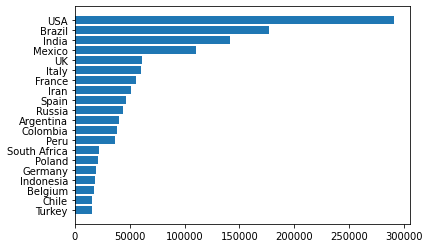

In [50]:
plt.barh(top["Country_Other"],top['Total_Deaths'])
plt.show()

We know that a large part of our audience will read the article on a mobile device. This means our graph needs to have mobile-friendly proportions: small width, larger height. Our graph currently has a small height and a larger width.

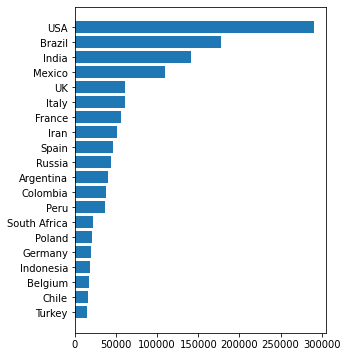

In [51]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top["Country_Other"],top['Total_Deaths'])
plt.show()

Now, let's remove all the four spines from the horizontal bar plot, the bottom and left ticks as well.

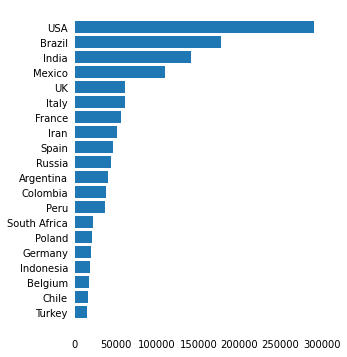

In [52]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top["Country_Other"],top['Total_Deaths'])

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
plt.show()

Now, let's reduce the thickness of each bar to a value of 0.45. and keep only 0, 150000, and 300000 as x-tick labels.

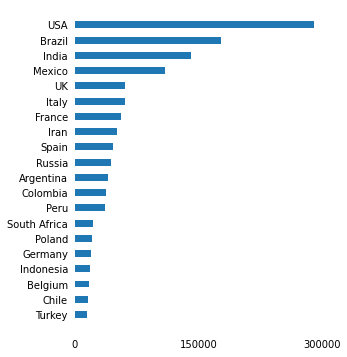

In [53]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top["Country_Other"],top['Total_Deaths'], height=0.45)
ax.set_xticks([0, 150000, 300000])

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
plt.show()

So far in our lesson, we've applied two design principles:

- We chose a horizontal bar graph using the familiarity principle.
- We modified the graph using the maximizing data-ink ratio principle.

Another aspect that we need to consider is the audience's direction of reading. As they scroll down through our article, they will read (and look at) our graph from top to bottom. More specifically, people usually start from top left and follow a zigzag pattern until they reach bottom right.

One problem with our graph is that the tick labels are located at the bottom. People will immediately see the country names, the bars, but they may get confused about the quantities. To address that, we're going to move the tick labels at the top of the graph.

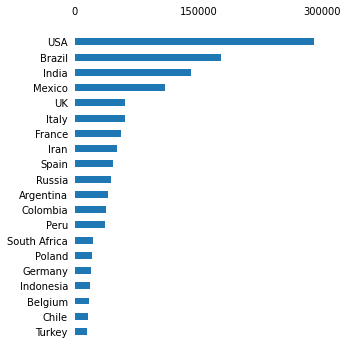

In [54]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top["Country_Other"],top['Total_Deaths'], height=0.45)
ax.set_xticks([0, 150000, 300000])

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
plt.show()

Right now, the first thing people will probably see are the x-tick labels. We want readers to focus on the data, so we'll do two things:

- We'll color the x-tick labels in grey so they don't stand out visually so much.
- We'll color the bars in a shade of red.

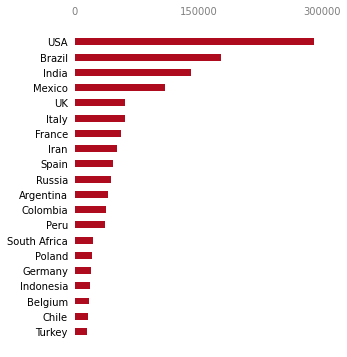

In [55]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top["Country_Other"],top['Total_Deaths'], height=0.45, color='#af0b1e')
ax.set_xticks([0, 150000, 300000])

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
plt.show()

If someone looks at our graph, they won't be able to tell what the quantity means. They see the USA has almost 300,000 of something, but what is that something?

Therefore,  we'll use the title and subtitle area to give the readers the necessary details. We will do the following :
- Add a subtitle that explains what the quantity describes and when the data was collected.
- Use the title to show readers more data 

We'll report that the death toll worldwide has surpassed 1.5M (data source: [Worldometers](https://www.worldometers.info/)).

Now, let's add the title 'The Death Toll Worldwide Is 1.5M+' and the subtitle 'Top 20 countries by death toll (December 2020)' to our graph. 

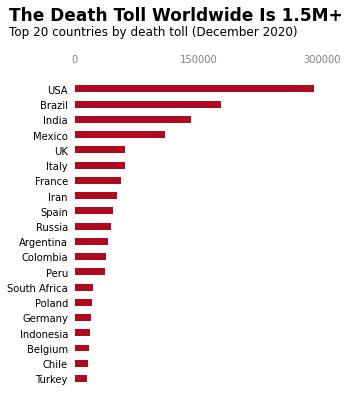

In [56]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top["Country_Other"],top['Total_Deaths'], height=0.45, color='#af0b1e')
ax.set_xticks([0, 150000, 300000])

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')

ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
        size=17, weight='bold')
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
        size=12)
plt.show()

Next, we're only going to give it some final touches. First, we'll make the y-tick labels easier to read. We'll add a comma to both 150000 and 300000 to make them more readable — so people don't have to struggle to tell whether it's a 30,000 or a 300,000, for instance.

We'll thereafter left align the y axis. Also, the Readers who explore the graph will try to determine the approximate death toll for each country. To help them, we're going to draw a vertical line below the 150,000 value.

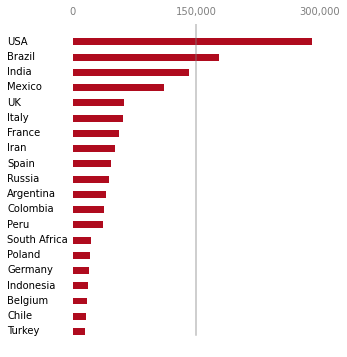

In [57]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top["Country_Other"],top['Total_Deaths'], height=0.45, color='#af0b1e')
ax.set_xticks([0, 150000, 300000])


for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')

# New codes 

ax.set_xticklabels(['0', '150,000', '300,000'])
ax.set_yticklabels([]) # an empty list removes the labels
country_names = top['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)
ax.axvline(x=150000, ymin=0.045, c='grey',
           alpha=0.5)
plt.show()

According to some, what we did is storytelling with data. However, is presenting the top 20 countries according to death toll really a story?

In a broad sense, a story is a sequence of events: something happens, then something else happens, and so on. Rather than events, our graph above presents facts.

Another story element is change: something or someone changes throughout the story. Our graph is static: the information we present doesn't show any element of change.

There's nothing wrong with showing facts or presenting static information, but that's not a story. To create a data story, we need to wrap those numerical facts into events that show change.

For our example above, we can take the particular case of the United States and show how the death toll has changed since the beginning of the pandemic.


Next, we'll draw the four line plots that show the evolution of average daily deaths per month in 2020. The data was collected from the [World Health Organization](https://covid19.who.int/) on December 15th, 2020. Below, we see the first five rows of the data:

## Dataframe 2

In [58]:
death_toll = pd.read_csv('covid_avg_deaths.csv')
death_toll.info()
death_toll

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Month       12 non-null     int64
 1   New_deaths  12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


Below is the meaning of the two columns :

- Month: the month number.
- New_Deaths: the number of daily average deaths for each month. A value of 1,844 for April means that for each day of April, there were 1,844 deaths, on average.

Now, let's create a grid chart of four rows by one column, and on each of the four plots, draw a line plot with the Month column on the x-axis and the New_deaths columns on the y-axis.

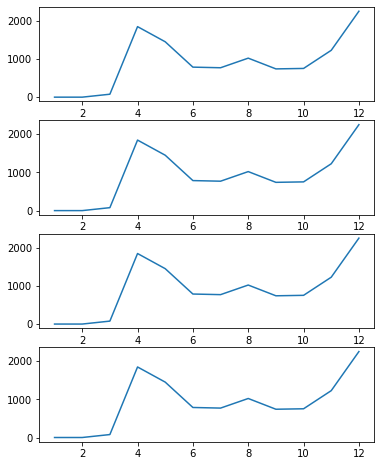

In [59]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
plt.show()

Now, in the spirit of maximizing the data-ink ratio, let's also remove the ticks and the spines (the x- and y-axes).
We will iterate over a list containing the four Axes objects, and for each Axes object, we'll do the following:

- Generate a line plot with the Month column on the x-axis and the New_deaths columns on the y-axis.
- Remove the x- and y-tick labels.
- Remove all ticks
- Remove all the spines

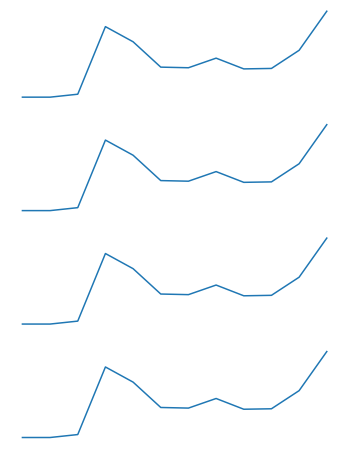

In [60]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
    ax.tick_params(bottom=False, left=False, right = False, top = False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
plt.show()


# axes = [ax1, ax2, ax3, ax4]
# for ax in axes:
#     ax.plot(death_toll['Month'], death_toll['New_deaths'])
#     ax.set_yticklabels([])
#     ax.set_xticklabels([])
#     ax.tick_params(bottom=0, left=0) 
#     for location in ['left', 'right', 'top', 'bottom']:
#         ax.spines[location].set_visible(False)
# plt.show()

Now, the storytelling data visualization we want must emphasize four periods:

- January–March
- March–June
- June–October
- October–December

To highlight these four periods, we begin by coloring all plots in a shade of red. Then, we increase their transparency by using the alpha parameter.

And then, we draw separate line plots on top of the current ones. We begin by drawing the first one; we use the same color and increase the line width using the linewidth parameter.

Let's now highlightthese four periods

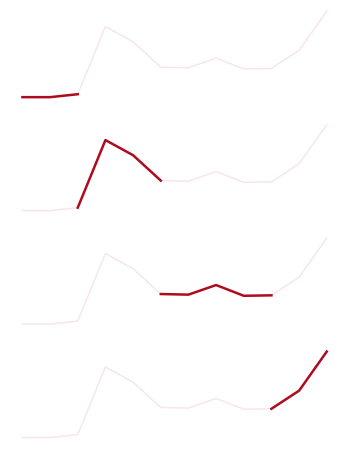

In [61]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10], color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12], color='#af0b1e', linewidth=2.5)

plt.show()

Right now, our graph has a very high data-ink ratio, which is good. Except for the four highlighted periods, we can't remove anything without losing important data.
However, we still need to add a few structural elements so the audience can understand the visualization.

Let's now add labels for the four periods

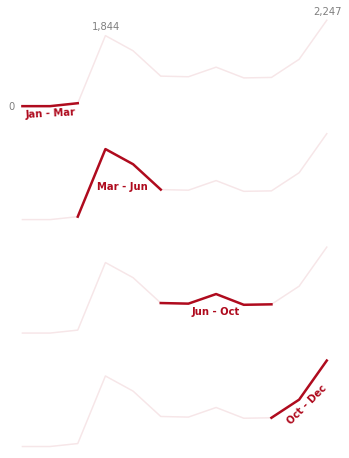

In [62]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)

ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)
plt.show()

Our visualization is still not readable enough. Readers see four identical plots, a few quantities, and four distinct periods. However, they can't tell what the quantities mean. We'll use the subtitle to inform readers about what the quantities describe.

Let's add a title and a subtitle to our graph.

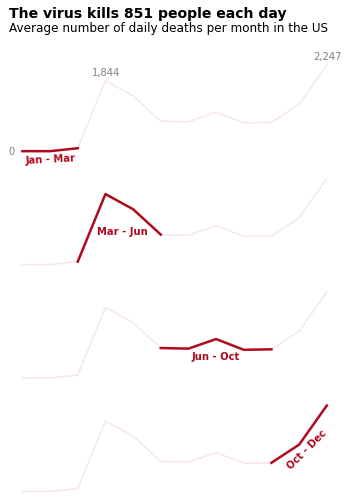

In [63]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')

ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')

ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)
ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 
plt.show()

## Dataframe 3

The aim of this subsection is to focus our attention on Matplotlib's pre-defined styles.

We're going to use a dataset on wine quality. Researchers P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. collected this data for their [research paper](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377). We can find documentation and download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).

The data comes in the form of two files:

- winequality-red.csv: data for red wine.
- winequality-white.csv: data for white wine.

In [64]:
red = pd.read_csv('winequality-red.csv', sep=';')
red.info()
red.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We want to determine which attributes (pH, alcohol level, etc.) most strongly correlate with wine quality. Below, we see the correlation values between quality and the other columns.

In [70]:
red_corr = red.corr()['quality'][:-1]
red_corr

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

We observe that Red wine quality most strongly correlates with alcohol level and volatile acidity. More information can be found on the Internet on each wine property. In this [article](https://extension.psu.edu/volatile-acidity-in-wine), for instance, we see that volatile acidity contributes to the smell and taste of vinegar in wine.

Let's now calculate correlations for the white wine dataset.

In [71]:
white = pd.read_csv('winequality-white.csv', sep=';')
white.info()
white.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [72]:
white = pd.read_csv('winequality-white.csv', sep = ';')
white_corr = white.corr()['quality'][:-1]
white_corr

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

Previously, we calculated the correlation values between wine quality and wine properties. We want to represent these values visually in the form of two bar plots.

Let's start by creating the two bar plots using the fivethirtyeight style.

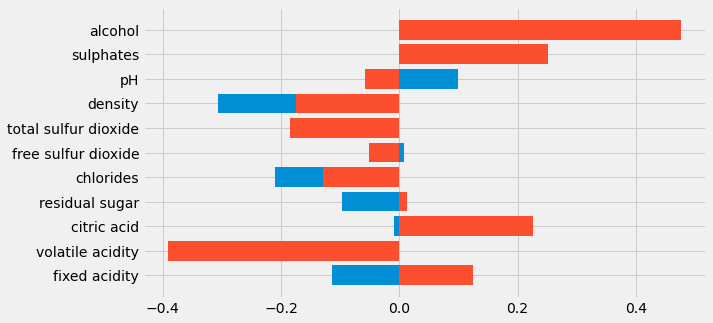

In [74]:
import matplotlib.style as style

style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr)
ax.barh(red_corr.index, red_corr)
plt.show()

We can tell from the two colors that Matplotlib built two different bar plots. It's not clear which is which, though.

To separate them, we're going to move the white wine plot to the right side of the graph.

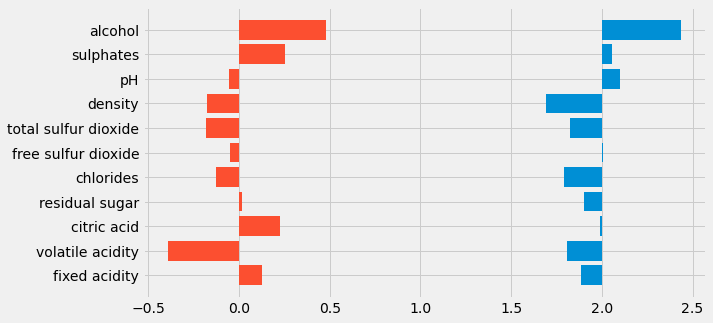

In [79]:

style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2)   # Moves the data from 0 to 2, to the right hand side
ax.barh(red_corr.index, red_corr)
plt.show()

Based on the principle of proximity, we now see two different bar plots: the red wine plot on the left (red-colored), and the white wine plot on the right (blue-colored).

Now, let's do the following : 

- Remove the grid of the graph
- Remove the x- and y-tick labels
- And reduce the width of each bar to 0.5 

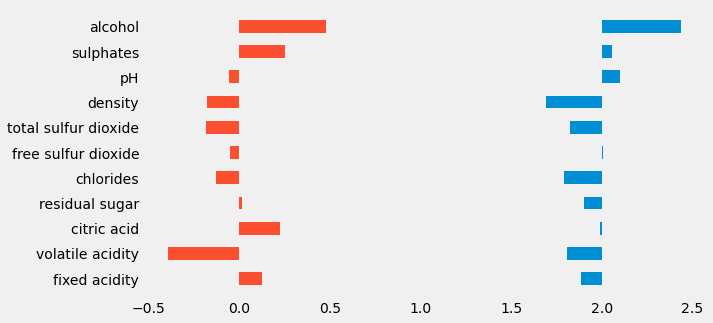

In [80]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2, height=0.5)
ax.barh(red_corr.index, red_corr, height=0.5)

ax.grid(b=False)
# ax.set_yticklabels([])
# ax.set_xticklabels([])

plt.show()

We'll now focus on adding structural elements so the audience can read the graph.

We begin by adding a title to each bar plot to show which is the plot for red wine and which is the other. To do that, we're going to draw a horizontal line above each plot. Then, we'll write "RED WINE" and "WHITE WINE" respectively above the horizontal lines.

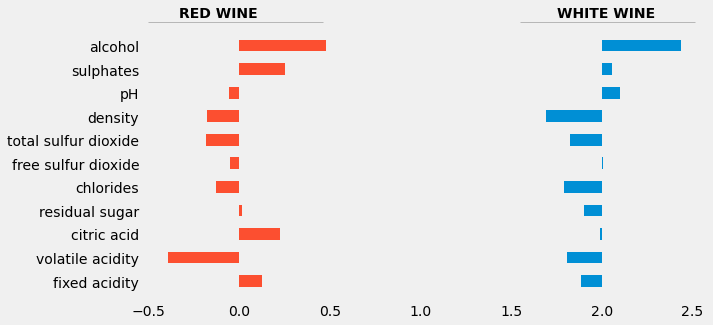

In [83]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2, height=0.5)
ax.barh(red_corr.index, red_corr, height=0.5)
ax.grid(b=False)

# Code for Title

ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.text(-0.33, 11.2, 'RED WINE', weight='bold')

ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
          xmin=0.67, xmax=0.98)
ax.text(1.75, 11.2, 'WHITE WINE', weight='bold')
plt.show()

The last change we're going to make to our graph is the bar colors:

- Positive correlation values will take the color #33A1C9 (a tint of blue).
- Negative correlation values will take the color #ffae42 (a tint of orange).

In [94]:
white_corr = white.corr()['quality'][:-1]
positive_white = white_corr >= 0
color_map_white = positive_white.map({True:'#33A1C9',
                                      False:'#ffae42'}
                                    )
print(color_map_white)
print('\n')

red_corr = red.corr()['quality'][:-1]
positive_red = red_corr >= 0
color_map_red = positive_red.map({True:'#33A1C9',
                                      False:'#ffae42'}
                                    )
print(color_map_red)

fixed acidity           #ffae42
volatile acidity        #ffae42
citric acid             #ffae42
residual sugar          #ffae42
chlorides               #ffae42
free sulfur dioxide     #33A1C9
total sulfur dioxide    #ffae42
density                 #ffae42
pH                      #33A1C9
sulphates               #33A1C9
alcohol                 #33A1C9
Name: quality, dtype: object


fixed acidity           #33A1C9
volatile acidity        #ffae42
citric acid             #33A1C9
residual sugar          #33A1C9
chlorides               #ffae42
free sulfur dioxide     #ffae42
total sulfur dioxide    #ffae42
density                 #ffae42
pH                      #ffae42
sulphates               #33A1C9
alcohol                 #33A1C9
Name: quality, dtype: object


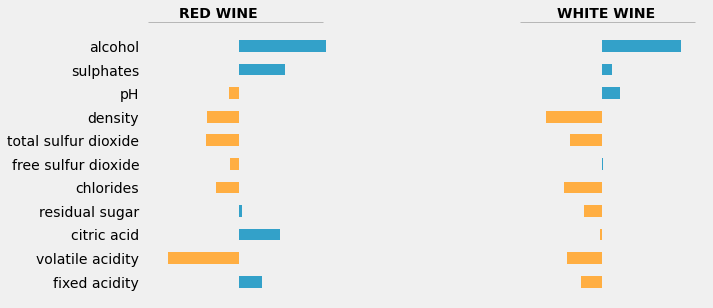

In [95]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, color=color_map_white, height=0.5, left=2) # Mapping the color
ax.barh(red_corr.index, red_corr, color=color_map_red, height=0.5) # Mapping the color
ax.grid(b=False)

# Code for Title

ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.text(-0.33, 11.2, 'RED WINE', weight='bold')

ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
          xmin=0.67, xmax=0.98)
ax.text(1.75, 11.2, 'WHITE WINE', weight='bold')
#ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()